# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [2]:
%matplotlib inline
import pandas as pd

filename = "./../../assets/datasets/Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
data.info()
print len(data)
print data.price.min()
print len(data[data.sq__ft == 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB
985
1551
171


In [4]:
clean=data[data.sq__ft != 0]

clean.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

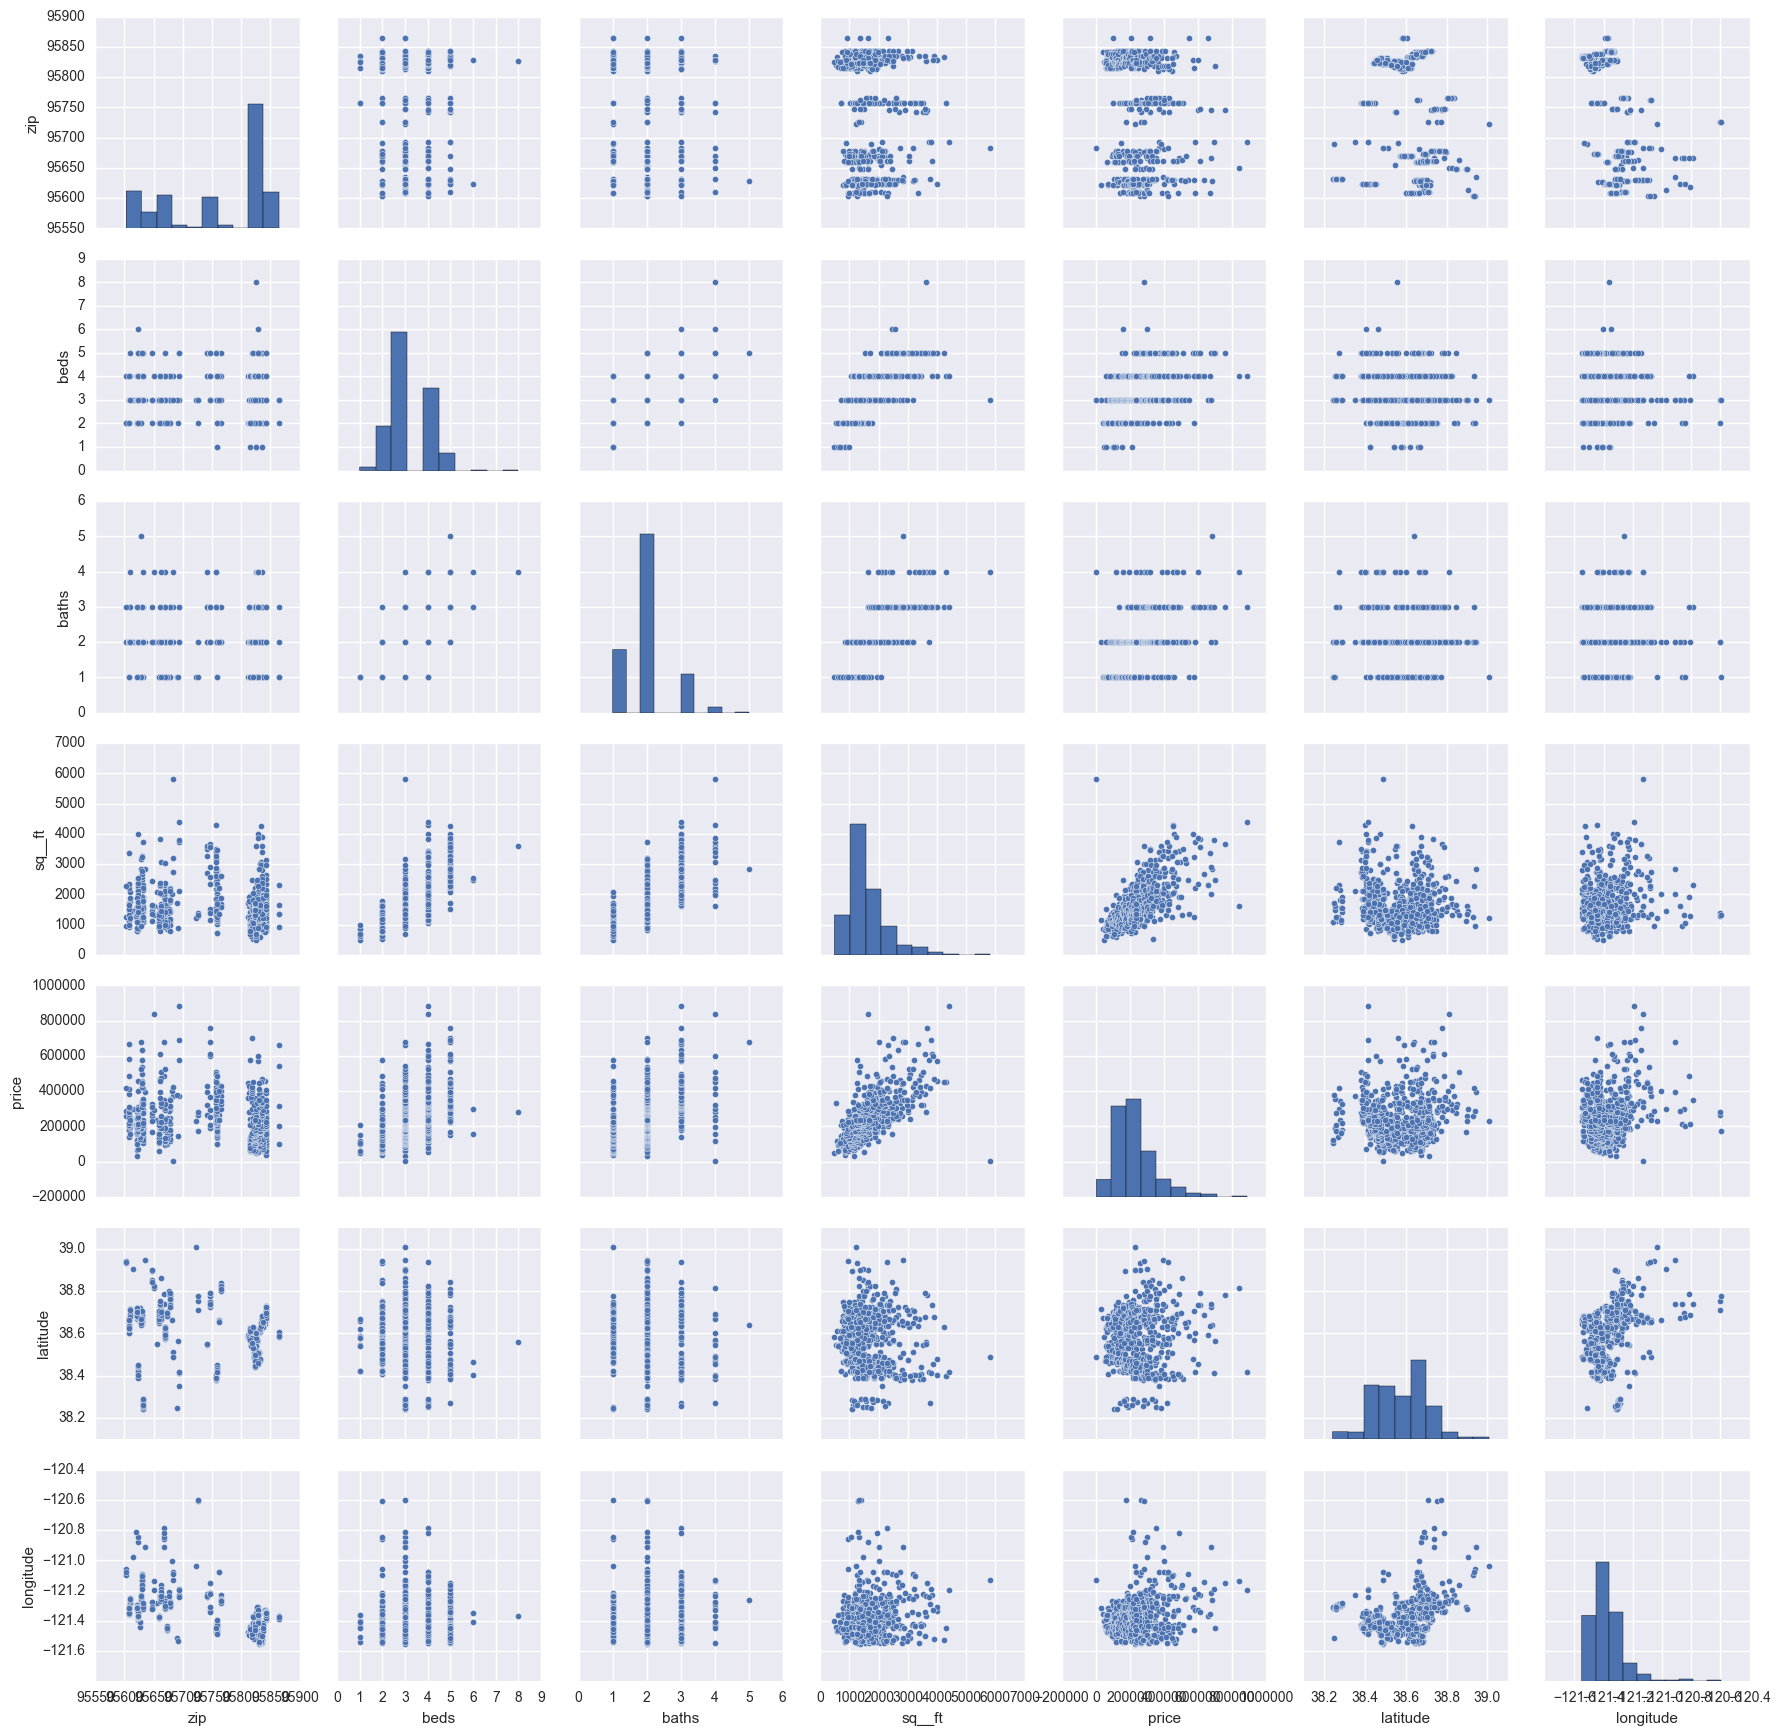

In [6]:
import seaborn as sns
sns.pairplot(clean)

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

In [11]:
clean.columns.values

array(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'], dtype=object)

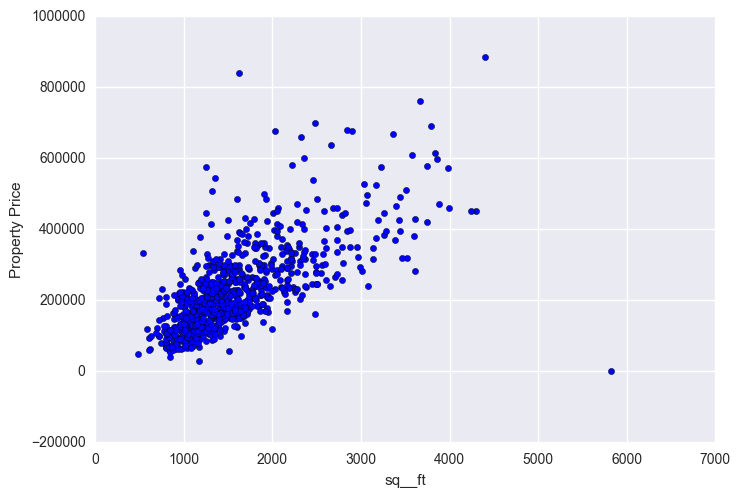

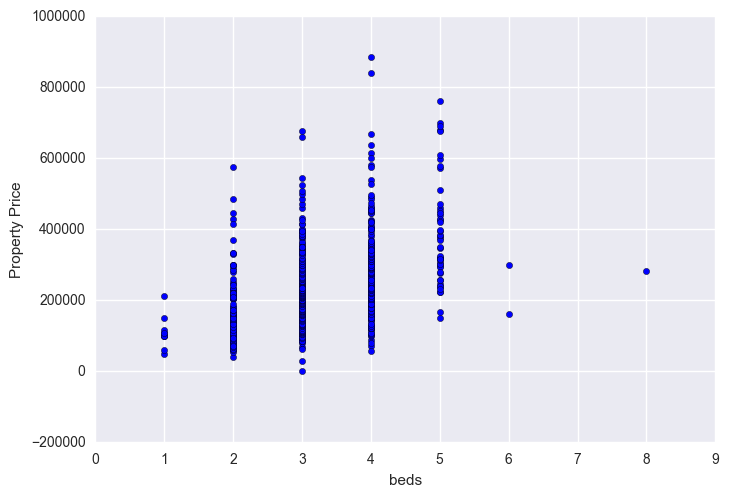

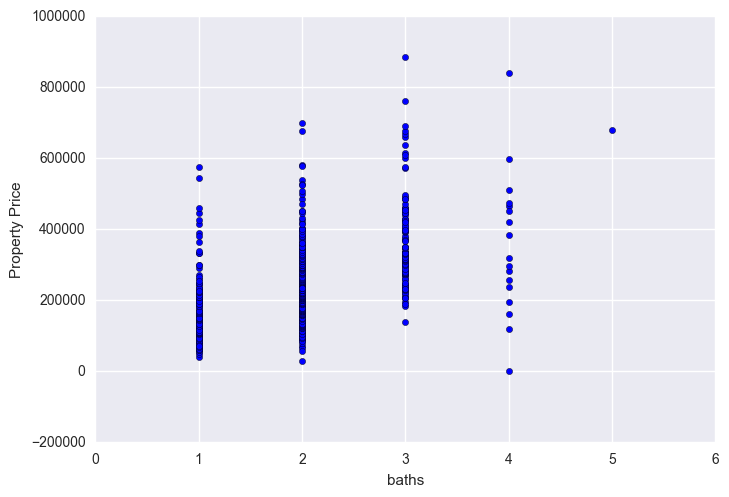

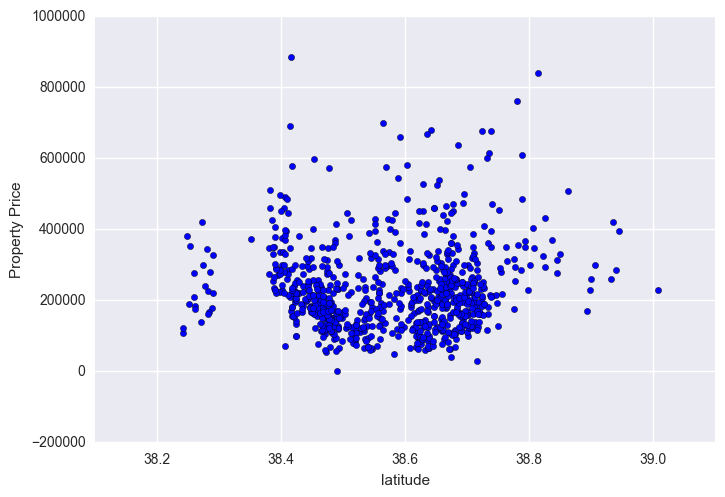

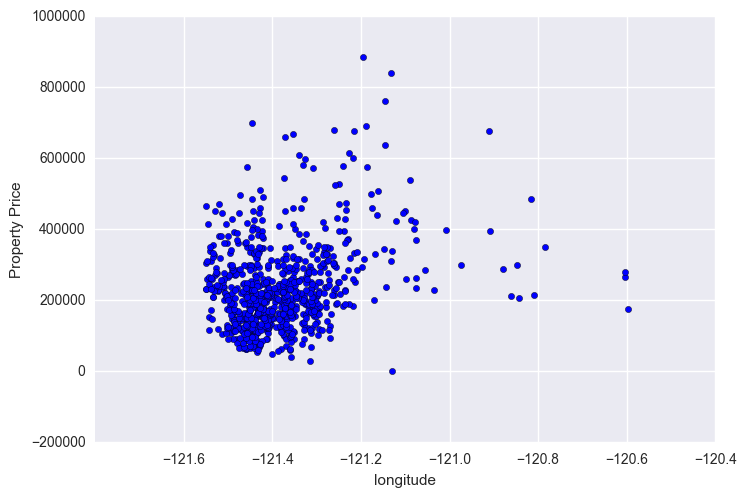

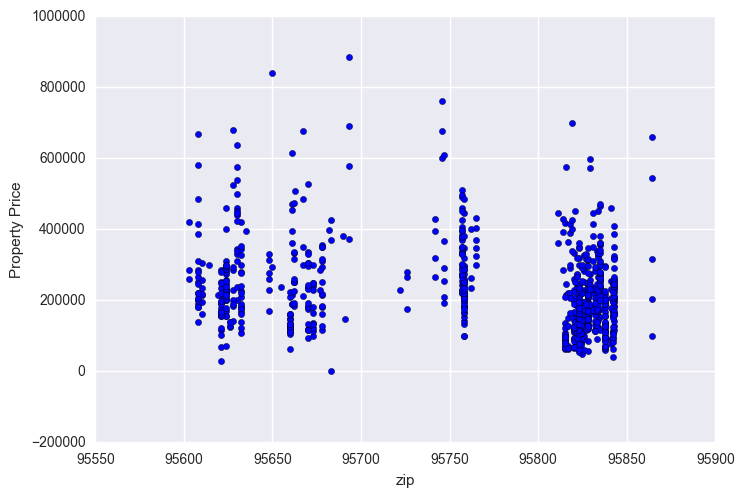

In [39]:
from matplotlib import pyplot as plt

for cols in clean[['sq__ft','beds','baths','latitude','longitude','zip']]:
    x = clean[cols]
    y = clean['price']

    plt.scatter(x, y)
    plt.xlabel(cols)
    plt.ylabel("Property Price")
    plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

In [29]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

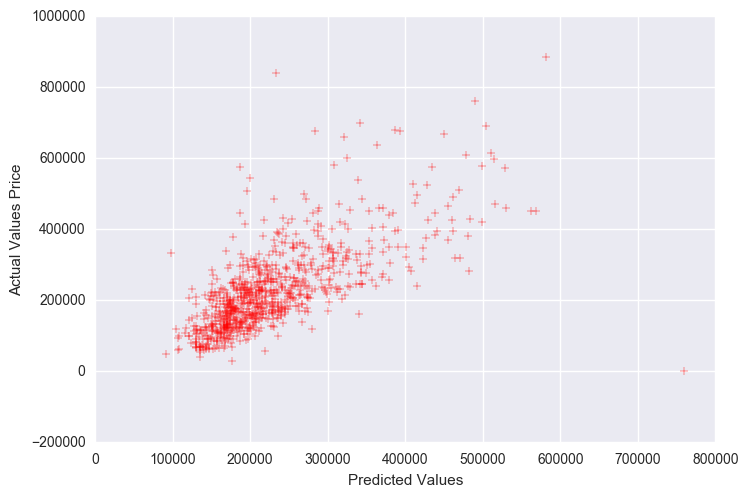

MSE: 7439426337.1


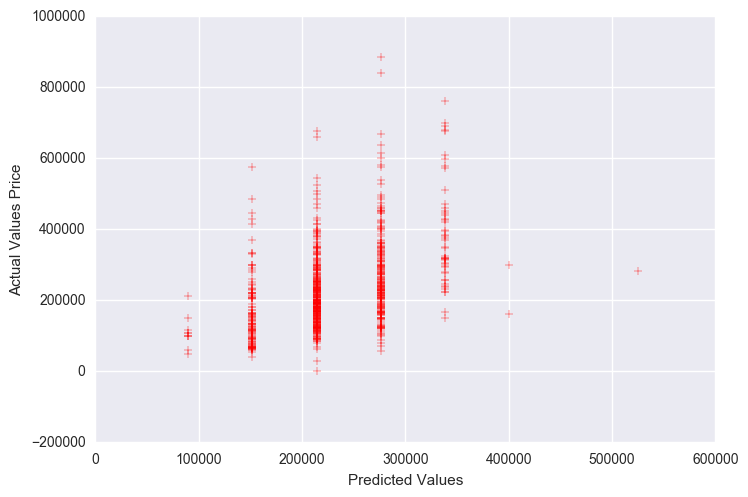

MSE: 11539061846.2


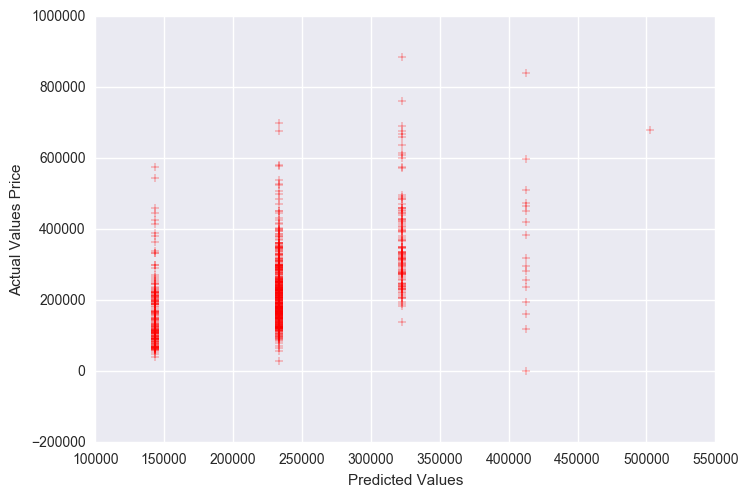

MSE: 10729253812.3


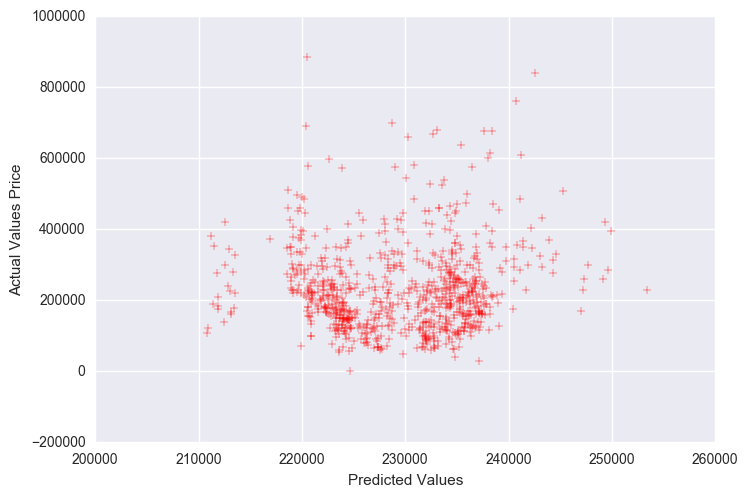

MSE: 14291495230.1


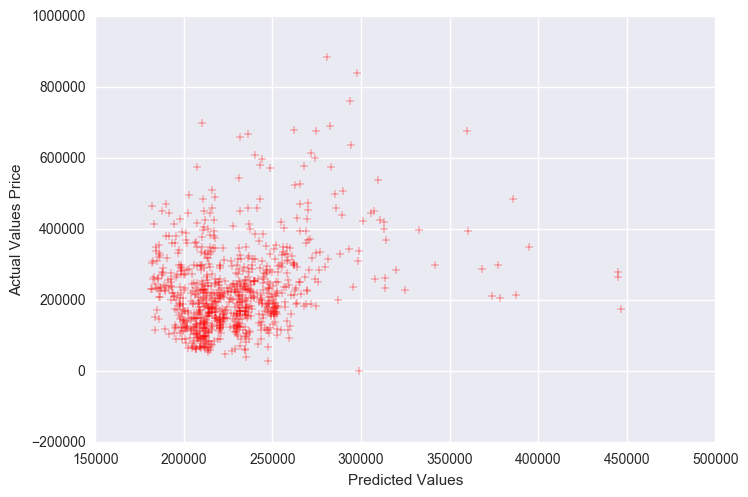

MSE: 13229747963.4


In [41]:
lm = linear_model.LinearRegression()

for cols in clean[['sq__ft','beds','baths','latitude','longitude']]:
    x=clean[[cols]]
    y=clean['price']

    model=lm.fit(x,y)
    predictions = model.predict(x)
    # # Plot the model
    plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values Price")
    plt.show()
    print "MSE:", mean_squared_error(y, predictions)

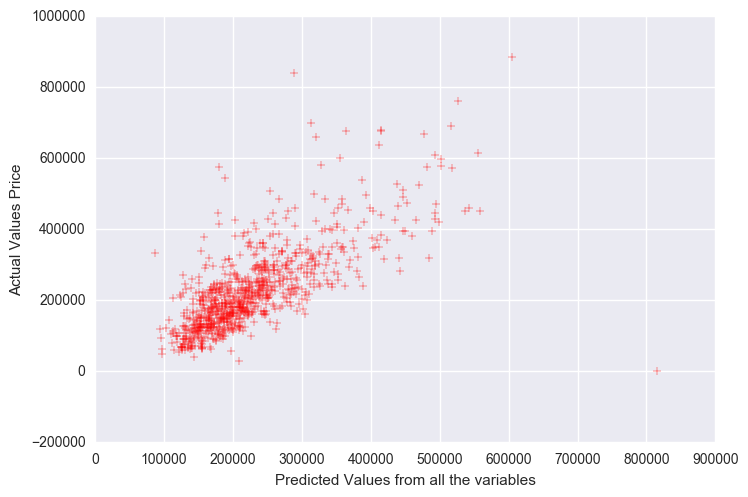

MSE: 6792155686.06


In [43]:
x=clean[['sq__ft','longitude','latitude','beds','baths','zip']]
y=clean['price']

model=lm.fit(x,y)
predictions = model.predict(x)
# # Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all the variables")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

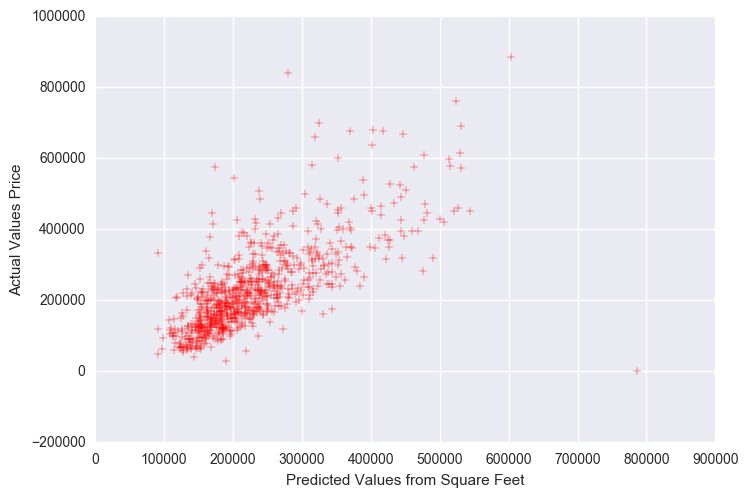

MSE: 6944252325.78


In [44]:
x=clean[['sq__ft','longitude']]
y=clean['price']

model=lm.fit(x,y)
predictions = model.predict(x)
# # Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Square Feet and Longitude")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

In [47]:
def predictReturnNumber(a):
    X = clean[a]
    y = clean["price"]

    model = lm.fit(X, y)
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    return mse

cols = clean[['sq__ft','longitude','latitude','beds','baths','zip']]
lowest2 = {'val':-1,'x':'','y':'','z':''}
for idx,x in enumerate(cols):
    for idx2,y in enumerate(cols):
        for idx3,z in enumerate(cols):
            if (idx3 > idx2 > idx and x != y != z):
                predict = predictReturnNumber([x,y,z])
                if (lowest2['val'] == -1 or predict < lowest2['val']) :
                    lowest2 = {'val':predict,'x':x,'y':y,'z':z}
            
print lowest2


{'y': 'longitude', 'x': 'sq__ft', 'z': 'latitude', 'val': 6878171335.574461}


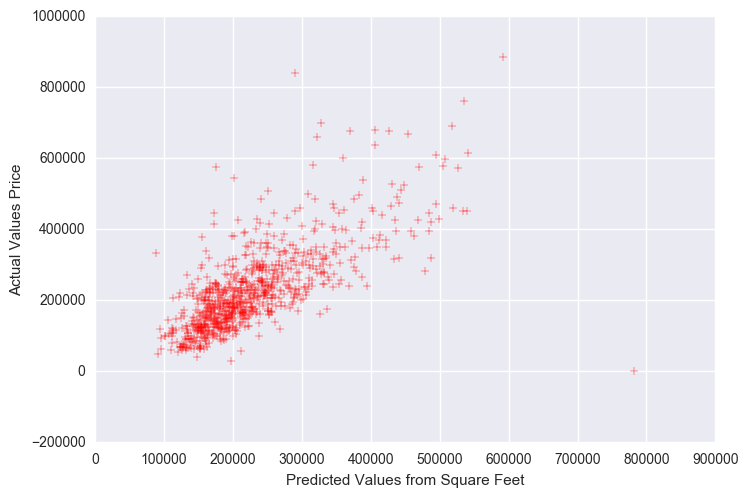

MSE: 6878171335.57


In [48]:
x=clean[['sq__ft','longitude','latitude']]
y=clean['price']

model=lm.fit(x,y)
predictions = model.predict(x)
# # Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from best 3 variables")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

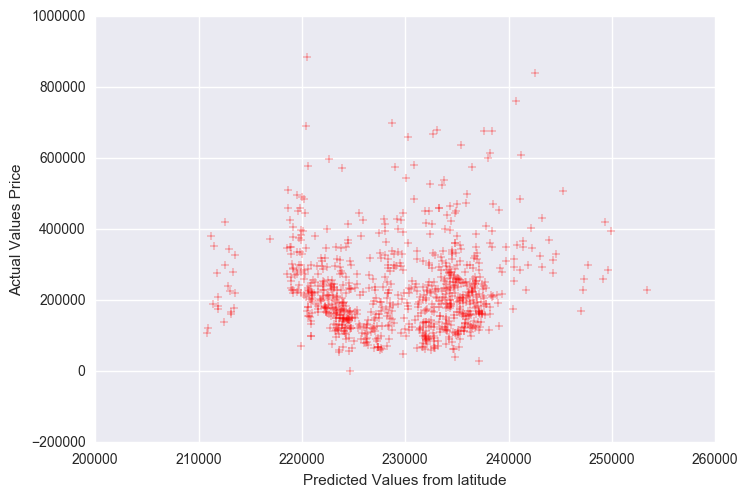

MSE: 14291495230.1


In [53]:
x=clean[['latitude']]
y=clean['price']

model=lm.fit(x,y)
predictions = model.predict(x)
# # Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from latitude")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

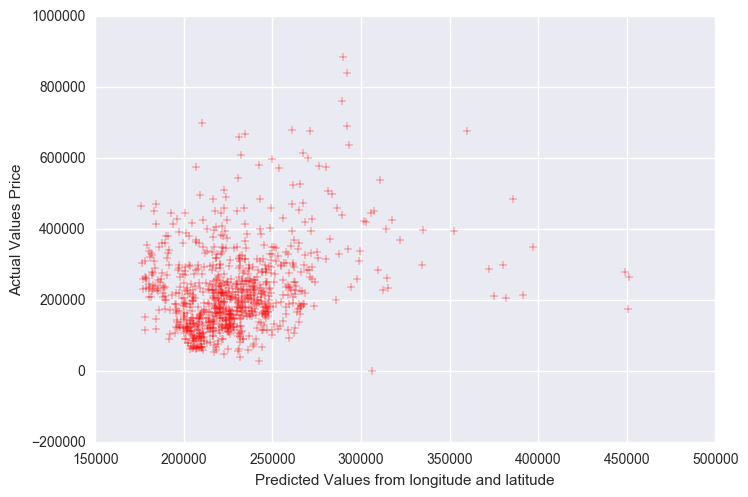

MSE: 13207007822.4


In [52]:
x=clean[['longitude','latitude']]
y=clean['price']

model=lm.fit(x,y)
predictions = model.predict(x)
# # Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from longitude and latitude")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)